## The pipeline

In [1]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset
# 2. Summarize Data
# a) Descriptive statisticsJJ
# b) Data visualizations
# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms
# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms
# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles
# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

## Load libraries

In [2]:
# Load libraries
# import numpy, pandas, scipy, math, matplotlib
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from pandas.plotting import scatter_matrix
import time

# Cleaning and Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix

# Models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# multi level Models
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN


# training and cross-validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix


#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score



### Load the dataset

In [3]:
pwd

'C:\\Users\\nsrid\\OneDrive\\Documents\\UT Datascience certification\\My_Jupyter_notebooks'

In [4]:
# Load dataset
rawData = pd.read_csv('trainingData_capstone.csv')
rawData

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [5]:
# To print the number of rows and columns
num_rows, num_cols  = rawData.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 529
Number of rows: 19937


<font color='blue'> 
### Exploratory data analysis
#### Summarize the Dataset
##### Dimensions of the dataset.
######  Peek at the data itself. 
######  Statistical summary of all attributes.
######  Breakdown of the data by the class variable.
    

In [6]:
# Simple breakdown
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [7]:
# Detailed breakdown
rawData.info

<bound method DataFrame.info of        WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0         100     100     100     100     100     100     100     100     100   
1         100     100     100     100     100     100     100     100     100   
2         100     100     100     100     100     100     100     -97     100   
3         100     100     100     100     100     100     100     100     100   
4         100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
19932     100     100     100     100     100     100     100     100     100   
19933     100     100     100     100     100     100     100     100     100   
19934     100     100     100     100     100     100     100     100     100   
19935     100     100     100     100     100     100     100     100     100   
19936     100     100     100     100     100     100     100     100     100

In [8]:
# Check the name of the columns
col_names = rawData.columns.values
col_names

array(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006',
       'WAP007', 'WAP008', 'WAP009', 'WAP010', 'WAP011', 'WAP012',
       'WAP013', 'WAP014', 'WAP015', 'WAP016', 'WAP017', 'WAP018',
       'WAP019', 'WAP020', 'WAP021', 'WAP022', 'WAP023', 'WAP024',
       'WAP025', 'WAP026', 'WAP027', 'WAP028', 'WAP029', 'WAP030',
       'WAP031', 'WAP032', 'WAP033', 'WAP034', 'WAP035', 'WAP036',
       'WAP037', 'WAP038', 'WAP039', 'WAP040', 'WAP041', 'WAP042',
       'WAP043', 'WAP044', 'WAP045', 'WAP046', 'WAP047', 'WAP048',
       'WAP049', 'WAP050', 'WAP051', 'WAP052', 'WAP053', 'WAP054',
       'WAP055', 'WAP056', 'WAP057', 'WAP058', 'WAP059', 'WAP060',
       'WAP061', 'WAP062', 'WAP063', 'WAP064', 'WAP065', 'WAP066',
       'WAP067', 'WAP068', 'WAP069', 'WAP070', 'WAP071', 'WAP072',
       'WAP073', 'WAP074', 'WAP075', 'WAP076', 'WAP077', 'WAP078',
       'WAP079', 'WAP080', 'WAP081', 'WAP082', 'WAP083', 'WAP084',
       'WAP085', 'WAP086', 'WAP087', 'WAP088', 'WAP089', 'WAP0

In [9]:
# Identify the type of variables in the rawdataset
rawData.dtypes

WAP001              int64
WAP002              int64
WAP003              int64
WAP004              int64
WAP005              int64
                    ...  
SPACEID             int64
RELATIVEPOSITION    int64
USERID              int64
PHONEID             int64
TIMESTAMP           int64
Length: 529, dtype: object

In [10]:
rawData.head

<bound method NDFrame.head of        WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0         100     100     100     100     100     100     100     100     100   
1         100     100     100     100     100     100     100     100     100   
2         100     100     100     100     100     100     100     -97     100   
3         100     100     100     100     100     100     100     100     100   
4         100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
19932     100     100     100     100     100     100     100     100     100   
19933     100     100     100     100     100     100     100     100     100   
19934     100     100     100     100     100     100     100     100     100   
19935     100     100     100     100     100     100     100     100     100   
19936     100     100     100     100     100     100     100     100     100  

In [11]:
# First convert to float type for all variables that will be converted to float categories

columns = list(rawData.columns)
for i in columns: 
    # converting the types and printing the labels & types of the column 
    rawData[i] = rawData[i].astype('float64')
    print (rawData.dtypes)

WAP001              float64
WAP002                int64
WAP003                int64
WAP004                int64
WAP005                int64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003                int64
WAP004                int64
WAP005                int64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004                int64
WAP005                int64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             i

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             i

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             i

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: ob

In [12]:
# Class distribution: Check the balance of classification for a few variable types
rawData.groupby('SPACEID')['SPACEID'].count()
rawData.groupby('SPACEID')['SPACEID'].count()

SPACEID
1.0       65
2.0       80
3.0       97
4.0       95
5.0       60
        ... 
248.0    110
249.0     30
250.0     20
253.0     20
254.0     10
Name: SPACEID, Length: 123, dtype: int64

In [13]:
# Statistical description of each variable
rawData.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


### Checking for missing values


In [14]:
missing_values = rawData.isnull().sum()
missing_values

WAP001              0
WAP002              0
WAP003              0
WAP004              0
WAP005              0
                   ..
SPACEID             0
RELATIVEPOSITION    0
USERID              0
PHONEID             0
TIMESTAMP           0
Length: 529, dtype: int64

In [15]:
# to check for total missing values in the dataframe
total_cells = np.product(rawData.shape)
total_missing = missing_values.sum()

# To check for percentage of data that is missing
Perc_missing_data = (total_missing/total_cells) * 100

print('Percent of missing data = {}%'.format(Perc_missing_data))

Percent of missing data = 0.0%


##### Note that in the WAP columns there is numerous data points with '100'. These actually signify lack of data captured and will therefore accordingly managed after doing feature engineering

## To check for unique values for the building parameters (non WAP ID)

In [16]:
#Assess unique values for building parameters
unique_floors = rawData["FLOOR"].unique()
unique_bldgs = rawData["BUILDINGID"].unique()
unique_spaceid = rawData["SPACEID"].unique()
unique_rpos = rawData["RELATIVEPOSITION"].unique()
unique_users = rawData["USERID"].unique()
print('Unique Floors : {}'.format(unique_floors))
print('Unique Buildings : {}'.format(unique_bldgs))
print('Unique Space IDs : {}'.format(unique_spaceid))
print('Unique Relative Positions : {}'.format(unique_rpos))
print('Unique Users : {}'.format(unique_users))

Unique Floors : [2. 0. 3. 4. 1.]
Unique Buildings : [1. 0. 2.]
Unique Space IDs : [106. 103. 102. 122. 105. 101. 112. 104. 110. 108. 109. 111. 107.  15.
  29. 117.  16.  28.  22.  10.   2.   4.   3.   5.   6.   9.  27.   8.
   7.  26.  18. 216.  17. 217. 247. 248. 246. 245. 244. 243. 242. 241.
 240. 201. 202. 204. 203. 205. 207. 206. 209. 211. 208. 210. 212. 214.
 213. 215. 121. 219. 221. 222. 218. 220. 250. 223. 225. 224. 229. 226.
 227. 228. 233. 231. 230. 232. 236. 235. 234. 237. 238. 239. 141. 140.
 143. 113. 114. 116. 115. 120. 118. 128. 119. 129. 125. 124. 131. 127.
 132. 126. 133. 134. 137. 135. 136. 253. 254. 123. 130. 138. 139. 142.
 146. 147. 249. 144.   1.  30.  25.  13.  12.  11.  14.]
Unique Relative Positions : [2. 1.]
Unique Users : [ 2. 11.  3.  4.  5.  6.  7.  8.  9. 16. 10. 12. 13. 14. 15.  1. 17. 18.]


<font color='blue'> 
### Data visualization
######  Univariate plots to better understand each attribute.
######  Multivariate plots to better understand the relationships between attributes.

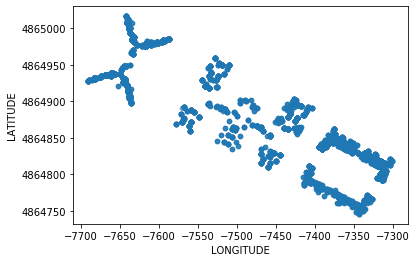

In [17]:
#Map the data i.e. see the campus
rawData.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.2)
plt.savefig('data_map.png')

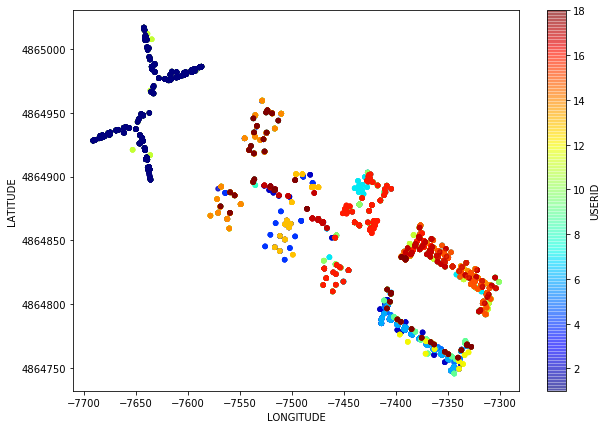

In [18]:
#map the data by user ID
#i.e. see how much of the information in each building was collected by how many users
rawData.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4, figsize=(10,7),
    c="USERID", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.savefig('user_map2.png')

#### Based on the  above plots, it is clear that there is a lot of unbalanced data in the userID building to building. It tells us only some users were in some of the buildings and hence it is likely to be omitted as part of feature engineering.

In [19]:
# plot the correlations between the WAPID features
corr_matrix = rawData.corr()
print(corr_matrix)

                    WAP001    WAP002  WAP003  WAP004    WAP005    WAP006  \
WAP001            1.000000 -0.000928     NaN     NaN -0.001348 -0.003762   
WAP002           -0.000928  1.000000     NaN     NaN -0.001385 -0.003865   
WAP003                 NaN       NaN     NaN     NaN       NaN       NaN   
WAP004                 NaN       NaN     NaN     NaN       NaN       NaN   
WAP005           -0.001348 -0.001385     NaN     NaN  1.000000 -0.005610   
...                    ...       ...     ...     ...       ...       ...   
SPACEID           0.016777 -0.035616     NaN     NaN  0.008474 -0.146094   
RELATIVEPOSITION -0.013458 -0.013827     NaN     NaN  0.043336  0.084678   
USERID           -0.011642  0.049948     NaN     NaN -0.023651  0.037283   
PHONEID           0.000123 -0.005633     NaN     NaN  0.020221  0.134668   
TIMESTAMP         0.063228  0.020383     NaN     NaN -0.024054 -0.066426   

                    WAP007    WAP008    WAP009    WAP010  ...  WAP520  \
WAP001        

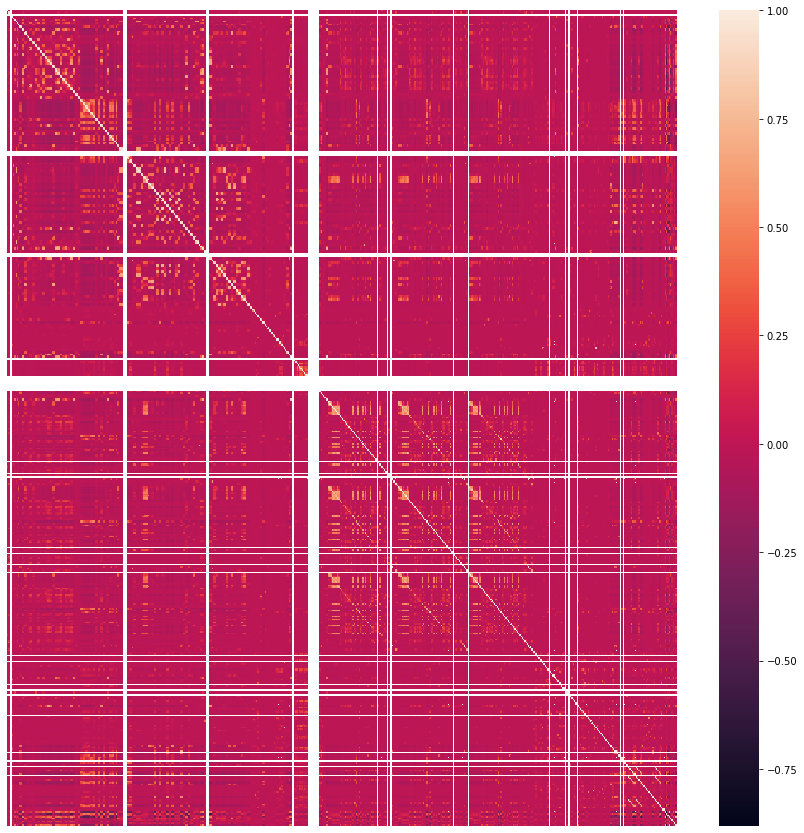

In [20]:
# Plotting the same using seaborn
corr_matrix = rawData.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,xticklabels=False, yticklabels=False)

##### Based on the above correlation, there is very little correlation among the WAP IDs. 

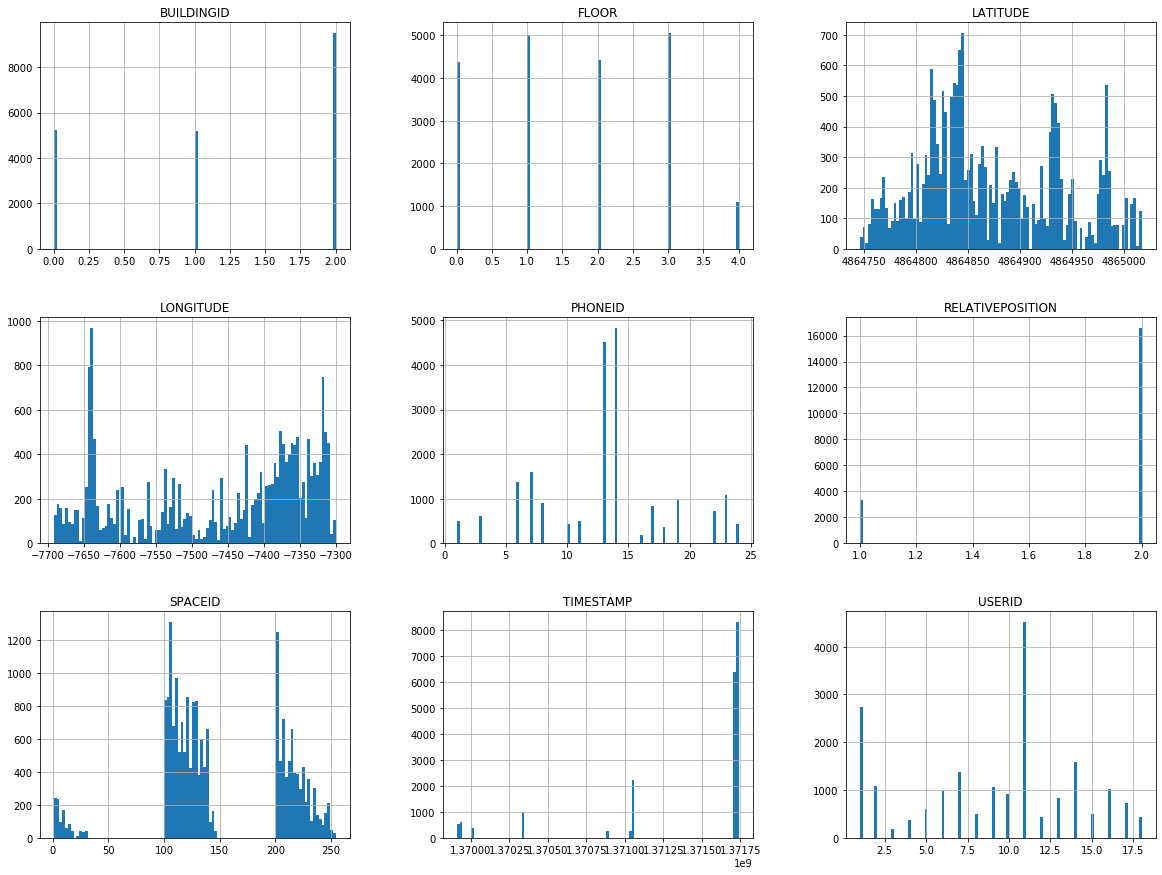

In [21]:
# plot the histograms of the remaining feature attributes  
rawData.iloc[:, 520:529].hist(bins=100, figsize=(20,15))
plt.savefig("Feature_histogram_plots")
plt.show()

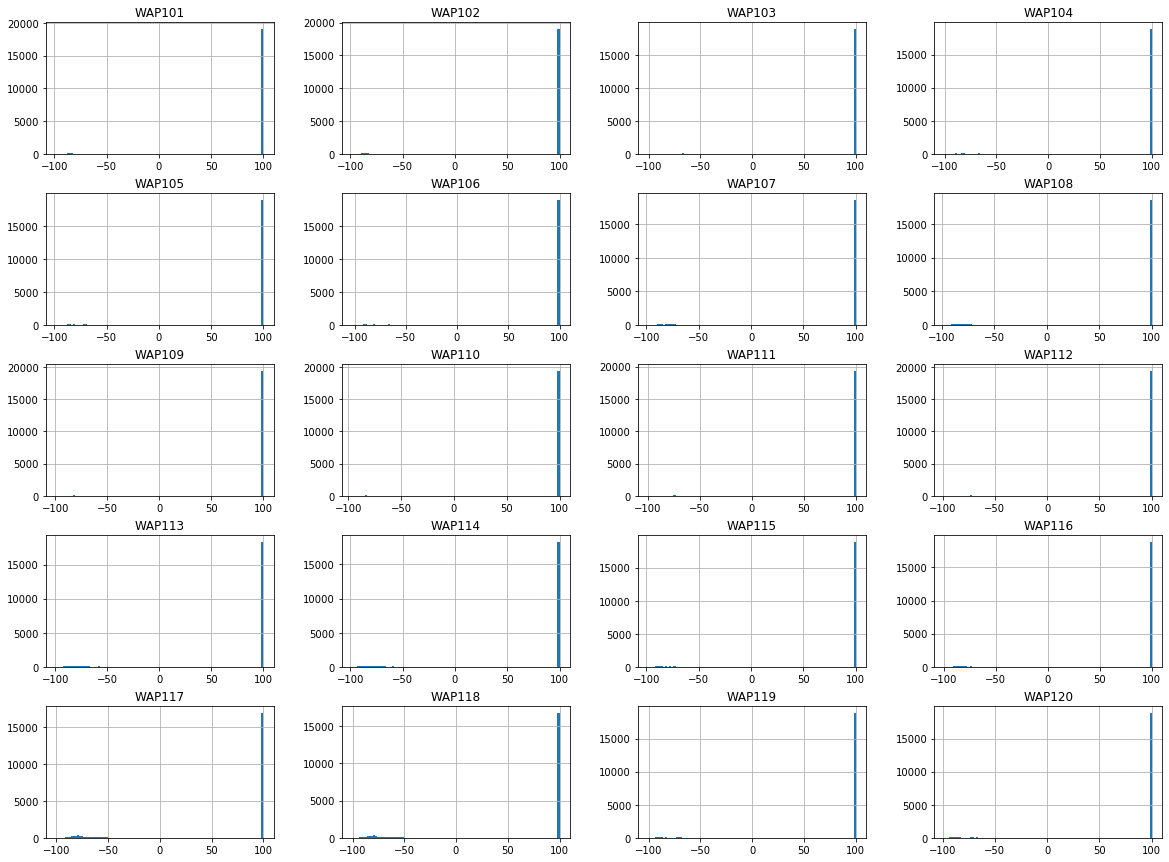

In [22]:
# plot the histograms of a random feature attributes for the WAP IDs
rawData.iloc[0:19937, 100:120].hist(bins=100, figsize=(20,15))
plt.savefig("WAPID_histogram_plots")
plt.show()

### Based on the histograms above, it appears that floor and building IDs can be used as target variables since this is a multi-classification problem. Latitude and longitude appears to be a continuous distribution and wouldnt be of much use for this problem.

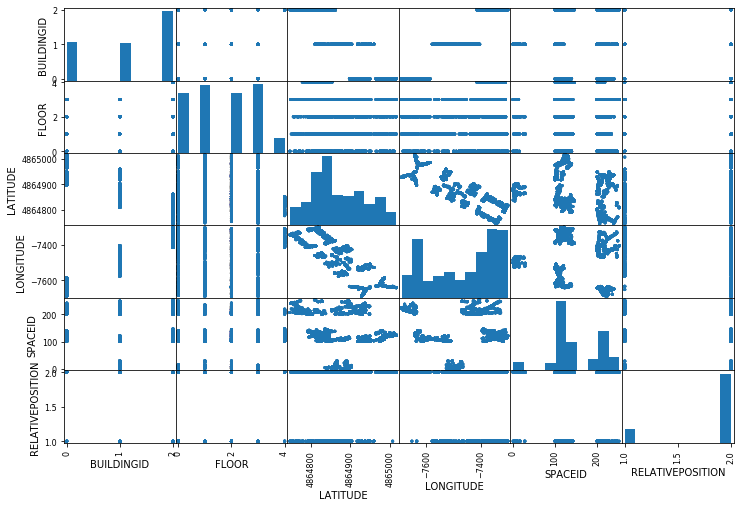

In [23]:
# Doing a scatter plot of these attributes to check for correlations among them
attributes = ["BUILDINGID","FLOOR", "LATITUDE", "LONGITUDE", "SPACEID", "RELATIVEPOSITION"]
scatter_matrix(rawData[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

#### Not much correlation seen in the scatter plots among these attributes

<font color='blue'> 
# Feature Engineering
#### Based on EDA, target variables picked for this project are Building ID and Floor

<font color='red'> 
### This solution will use multi-label classification algorithms. Reason - Reduction in computing power, time and memory usage. Secondly, this technique can simultaneously predict building ID and Floor for a given instance.
### On the other hand, multi-level algorithm classifications can predict only one target variable at a time - building ID or floor ID. Need to therefore create separate predictions by themselves which therefore implies significantly higher computing time and power and memory. Also the time to triangulate the exact location for a given instance is much longer due to the separate predictions.

In [24]:
# Creating the same data in a new dataframe for feature engineering
# In that way, we keep the original dataframe intact (in our case: rawData)
featured_data = rawData
featured_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(529)
memory usage: 80.5 MB


## Cleaning the data

In [25]:
# Remove these columns from the dataset based on EDA
# Selecting Building ID and Floor as the target variables.
# Since this will be repeated for training, test and validation dataset: a function is created
# The input for this function will be orginal dataframe broken in training, test and validation
# The dataset for this solution is featured_data
# Output will be the trimmed dataframe.
# Secondly, this function will also reverse the values of RSSI under the WAP IDs.
# Since 100 is not a detected signal, 100 will be changed to 0
# The values for others which are real signals but are negative because they are in dBM,
# will be converted to positive values.
# For example, the weakest signal (-104) will be converted to 1

# Cleaning the data function
def trim_data(df):
    
    df.iloc[:, 0:520] = np.where(df.iloc[:, 0:520] <= 0, 
                df.iloc[:, 0:520] + 105, 
                df.iloc[:, 0:520] - 100)
    
    # remove selected columns... 
    columns_removed = ['USERID', 'PHONEID','TIMESTAMP']
    for col in columns_removed:
        df.drop(col, axis=1, inplace=True)
    
   
    # Return the cleaned dataframe.
    return df

In [26]:
# Applying this to the dataframe as a whole: featured_data in this case
featured_data = trim_data(featured_data)
featured_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 526 entries, WAP001 to RELATIVEPOSITION
dtypes: float64(526)
memory usage: 80.0 MB


In [27]:
print(len(featured_data))

19937


## Pre-processing
#### Creating a function for splitting the attributes (features) and dependent variable(s) targets for a given dataset

In [28]:
# Pre-processing function
def create_feature_dep(df):
    """
    The goal of this function is to separates a given Data into Features and Targets
    This will be applied to featured_Data and validation_Data
    """
    
    global X
    global y
    # this splits the data set into features and target variables(Floor and BuildingID)
    X = df.drop(['LONGITUDE', 'LATITUDE','FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION'], axis=1)
    y = df[['BUILDINGID', 'FLOOR']]
    
    #Here we create Dummies for the target variables to be fed into the model
    y = pd.get_dummies(data=y, columns=['BUILDINGID', 'FLOOR'])
    
    
    return X, y

In [29]:
# Applying pre-processing to the featured_data dataframe
X, y = create_feature_dep(featured_data)

## Splitting the data into training and test data

In [30]:
def split_data(create_feature_dep):
#  Splitting the featured_data into training and testing sets 
    global X_train
    global X_test
    global y_train
    global y_test
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.2, 
                                                        random_state = 42,
                                                        shuffle=True)

    # Presenting the results of the split data
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [31]:
# Applying the split data function to the training and test dataset

X_train, X_test, y_train, y_test = split_data(create_feature_dep)

Training set has 15949 samples.
Testing set has 3988 samples.


## Standardization and Dimensionality reduction

#### Inspite of dropping some attributes, this dataset is still complicated.
#### We need to apply dimensionality reduction technique to focus only on the important components
#### PCA is used here and the goal is to further reduce computation time.

#### However, first, we need to standardize the WAP ID attributes.
#### Reason: Even though they have cell values from 0 to 105,  there is a range weightage issue.
#### Standardization is the right approach for PCA

In [32]:
#Standardization is done by scaling the data using Standard Scaler

scaler = StandardScaler()

#used for Fitting only the training set
#doing this will help transform the validation data 
scaler.fit(X_train)
    
# Apply transform to both training set and test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
#Apply PCA keeping 95% of the variation in the data
pca = PCA(.95)

    
#Fitting only the training set    
pca.fit(X_train)

# Applying PCA transform to both the training set and the test set.    
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Original number of features:", X_train.shape[1])
print("Reduced number of features:", X_train_pca.shape[1])

print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))
#print(pca.explained_variance_ratio_.sum())

Original number of features: 520
Reduced number of features: 258
Total Variance Explained by PCA Components = 0.95018443957599.


<font color='blue'> 
## From the above PCA application, it is clear that we reduced the features from 520 to 258!!

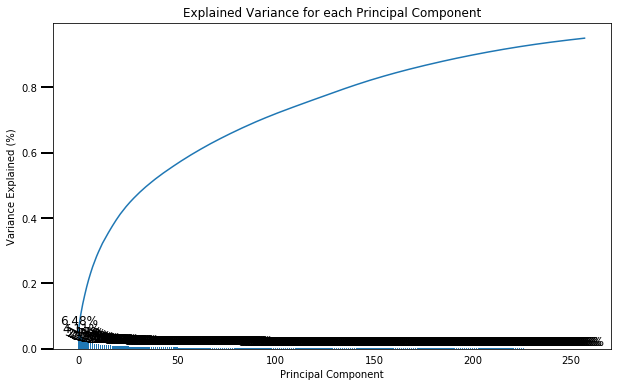

In [34]:
# Now lets implement the Scree plot
# The scree plot is used to determine the number of factors to 
# retain in principal components to keep in PCA.

def pca_plot(pca):
    
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance for each Principal Component')

pca_plot(pca)

In [35]:
print(len(X), len(y), len(X_train), len(X_test), len(y_train), len(y_test))

19937 19937 15949 3988 15949 3988


In [36]:
X_train_pca

array([[-1.22750053, -2.60425641, -0.40614015, ...,  0.28707594,
         0.15503242,  0.16903709],
       [-0.95563994,  3.3141275 , -0.94040422, ..., -0.30839862,
        -0.15800114,  0.05365073],
       [ 4.01471765, -2.91829045, -2.28593498, ..., -0.40898604,
        -0.00605632,  0.29624021],
       ...,
       [-0.90544948, -3.57020843, -1.3055463 , ..., -0.59223189,
        -0.43090764, -0.41085756],
       [-0.98545784, -1.74949591, -0.23530923, ..., -0.0955111 ,
        -0.1841814 , -0.04269742],
       [-1.09843826,  5.74127036, -3.47790864, ...,  0.40243069,
         1.06341914, -0.77259772]])

In [37]:
#Create sparse matrices to run the scikit multilearn algorithms

X_train_pca = lil_matrix(X_train_pca).toarray()
y_train = lil_matrix(y_train).toarray()
X_test_pca = lil_matrix(X_test_pca).toarray()
y_test = lil_matrix(y_test).toarray()

<font color='blue'> 
## When solving multi-label classification problems, there are two approaches,  
<u> - Problem tranformation </u> <br>
<u> - Adaptive approach </u>

 
1. Multiple single-label classification problems. Some of the algorithms include OneVsRest, Binary Relevance, Classifier Chains and Label Powerset.

2. The algorithmic adaptive approach focuses on adapting the algorithm to the multi-label classification problem directly.

###### In the following section, I applied both approaches to the problem to test for better performance and lower computing power.

<font color='red'> 
### Binary relevance
- Output is a combination of the target variables from prediction
- Easy to implement and simple approach

In [38]:
# using binary relevance
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

BR_classifier = BinaryRelevance(GaussianNB())
# train
BR_classifier.fit(X_train_pca, y_train)
# predict
predictions = BR_classifier.predict(X_test_pca)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Accuracy =  0.0619358074222668
--- Run time: 0.04 mins ---


<font color='red'> 
### Classifier chain
- Classifier chains are a way of combining a number of binary classifiers into a single multi-label model that is capable of exploiting correlations among targets.

In [39]:
# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

CC_classifier = ClassifierChain(GaussianNB())

# train
CC_classifier.fit(X_train_pca, y_train)

# predict
predictions = CC_classifier.predict(X_test_pca)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.18304914744232698
--- Run time: 0.05 mins ---


<font color='red'> 
### Label Powerset
- Label Powerset is a problem transformation approach to multi-label classification that transforms a multi-label problem to a multi-class problem with 1 multi-class classifier trained on all unique label combinations found in the training data.

In [40]:
# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

LP_classifier = LabelPowerset(GaussianNB())

# train
LP_classifier.fit(X_train_pca, y_train)

# predict
predictions = LP_classifier.predict(X_test_pca)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.4794383149448345
--- Run time: 0.02 mins ---


<font color='red'> 
### OneVsRest 
- The strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency (only n_classes classifiers are needed), one advantage of this approach is its interpretability. Since each class is represented by one and only one classifier, it is possible to gain knowledge about the class by inspecting its corresponding classifier. This is the most commonly used strategy and is a fair default choice.

In [41]:
# Using pipeline for applying logistic regression and one vs rest classifier
# pipeline class allows sticking multiple processes into a single scikit-learn estimator.
start_time = time.time()

pipe = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

# train
pipe.fit(X_train_pca, y_train)  
    
# predict
predictions = pipe.predict(X_test_pca)  

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.9383149448345035
--- Run time: 0.42 mins ---


<font color='red'> 
### Adaptive transformation
- Algorithm adaptation methods for multi-label classification concentrate on adapting single-label classification algorithms to the multi-label case usually by changes in cost/decision functions.
- Here we use a multi-label lazy learning approach named ML-KNN which is derived from the traditional K-nearest neighbor (KNN) algorithm: ML-KNN

In [42]:
start_time = time.time()

MLKNN_classifier = MLkNN(k=3)

# train
MLKNN_classifier.fit(X_train_pca, y_train)

# predict mlknn =3
predictions = MLKNN_classifier.predict(X_test_pca)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Accuracy =  0.9839518555667001
--- Run time: 1.97 mins ---


<font color = 'blue'>
    <b>Comment:</b>
    <u><b>MLKNN</b></u> is giving us the highest accuracy score of 98% even though it takes twice the amount of time compared to One Vs Rest. <u><b>MLKNN was picked as the right choice for prediction.</b></u> 
    <i> Why?</i> <br>
    - Because multi-level classification problems can predict only 1 label for each instance and therefore needs to be run twice before combining to see the effect. <br>
    - Secondly it takes around 1 hour per label which in other words takes 2 hours of overall computing time!!  <br> 
    - This is illustrated with 2 proven algos - KNN and RF classifier

<font color = 'red'> 
### Performing 2 multi-level classifications (the traditional approach) to showcase the long computing time using <u> KNN and Random Forest Classifier </u>

In [74]:
#Models
modelKNN = KNeighborsClassifier(n_neighbors =3,n_jobs = -1)
modelRF = RandomForestClassifier()


<font color = 'blue'> 
 ##### Doing evaluation for the same training set for two models typically used for classification problems with and without PCA

In [57]:
models = []
models.append(('RF', modelRF))
models.append(('KNN', modelKNN))
# evaluate each model in turn

In [ ]:
# Evaluate each model in turn to get the mean and std dev for each algorithm with no PCA
import time
start_time = time.time()
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

#### Note that it took close to 2 hours to run these 2 algos

In [122]:
# Make predictions on test dataset using the KNN model which is better than RF
# This is X data with PCA
modelKNN = KNeighborsClassifier(n_neighbors =3,n_jobs = -1)

modelKNN.fit(X_train_pca,y_train)

y_pred = modelKNN.predict(X_test_pca)

accuracy = round(accuracy_score(y_test, y_pred.round()), 3)
Classification_report = (classification_report(y_test, y_pred.round()), 3)
print('Accuracy: {}'.format(accuracy))
#print(Classification_report)
print(classification_report(y_test,y_pred))


Accuracy: 0.986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1078
           1       1.00      0.99      1.00      1001
           2       1.00      1.00      1.00      1909
           3       0.99      1.00      0.99       886
           4       0.99      0.98      0.98      1010
           5       0.98      0.98      0.98       882
           6       0.99      0.98      0.99       998
           7       1.00      1.00      1.00       212

   micro avg       0.99      0.99      0.99      7976
   macro avg       0.99      0.99      0.99      7976
weighted avg       0.99      0.99      0.99      7976
 samples avg       0.99      0.99      0.99      7976



<font color = 'blue'> 
## Based on the multi-label vs tradional approach, we will therefore proceed with the <u>M-KNN multilabel approach for prediction of test and validation data</u>

## Prediction on the test data

In [43]:
#pickle model first
 
from joblib import dump, load
dump(MLKNN_classifier, 'MLKNN_classifier.joblib')

['MLKNN_classifier.joblib']

In [44]:
#load pickled model
MLKNN_classifier = load('MLKNN_classifier.joblib')

In [67]:
#run predictions on our test data
# Using PCA featured dataset

test_pred =  MLKNN_classifier.predict(X_test_pca)

# accuracy
print("Accuracy = ",round(accuracy_score(y_test,test_pred), 3))

Accuracy =  0.984


In [87]:
# get number of rows in test_pred array
numOfRows = test_pred.shape[0]

# get number of columns in test_pred array
numOfCols = test_pred.shape[1]
 
print('Number of Rows : ', numOfRows)
print('Number of Columns : ', numOfCols)

Number of Rows :  3988
Number of Columns :  8


In [47]:
predictions

<3988x8 sparse matrix of type '<class 'numpy.int64'>'
	with 7958 stored elements in LInked List format>

In [88]:
test_pred

<3988x8 sparse matrix of type '<class 'numpy.int64'>'
	with 7958 stored elements in LInked List format>

#### Viewing the test prediction data and translating them

In [48]:
labels = y.columns.tolist()

In [49]:
labels

['BUILDINGID_0.0',
 'BUILDINGID_1.0',
 'BUILDINGID_2.0',
 'FLOOR_0.0',
 'FLOOR_1.0',
 'FLOOR_2.0',
 'FLOOR_3.0',
 'FLOOR_4.0']

In [50]:
labels_dict = {key: i for i, key in enumerate(labels)}

In [51]:
labels_dict

{'BUILDINGID_0.0': 0,
 'BUILDINGID_1.0': 1,
 'BUILDINGID_2.0': 2,
 'FLOOR_0.0': 3,
 'FLOOR_1.0': 4,
 'FLOOR_2.0': 5,
 'FLOOR_3.0': 6,
 'FLOOR_4.0': 7}

In [68]:
#See the predictions and translate them

#map the labels to their name
labels = y.columns.tolist() 
labels_dict = {key: i for i, key in enumerate(labels)}

#Turn predictions into readable list of lists
MLKNN_predictions = test_pred.rows.tolist()

#translate the values to their keys.
#Change the my_predictions[0] value to
#my_predictions[index_value] to translate insights
get_keys = [k for k, v in labels_dict.items() 
            if v in MLKNN_predictions[0]]

print(get_keys)

['BUILDINGID_0', 'FLOOR_3']


In [69]:
#Saving the test prediction data to a a csv file
test_prediction = pd.DataFrame(MLKNN_predictions, columns=['BuildingID', 'Floor']).to_csv('test_prediction.csv')

## Predict on the validation data

In [55]:
# Load dataset
ValidationData = pd.read_csv('validationData_capstone.csv')
ValidationData

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,100,100,100,100,100,100,100,100,100,100,...,100,-7317.344231,4.864796e+06,3,2,0,0,0,13,1381156711
1107,100,100,100,100,100,100,100,100,100,100,...,100,-7313.731120,4.864792e+06,3,2,0,0,0,13,1381156730
1108,100,100,100,100,100,100,100,100,100,100,...,100,-7637.535798,4.864903e+06,0,0,0,0,0,13,1381247781
1109,100,100,100,100,100,100,100,100,100,100,...,100,-7636.654005,4.864905e+06,0,0,0,0,0,13,1381247807


In [56]:
# First convert to float type for all variables that will be converted to float categories

columns = list(ValidationData.columns)
for i in columns: 
    # converting the types and printing the labels & types of the column 
    rawData[i] = rawData[i].astype('float64')
    print (rawData.dtypes)


WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: ob

Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    flo

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: ob

Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    flo

Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    flo

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: ob

WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: ob

Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    flo

Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    float64
Length: 526, dtype: object
WAP001              float64
WAP002              float64
WAP003              float64
WAP004              float64
WAP005              float64
                     ...   
LATITUDE            float64
FLOOR               float64
BUILDINGID          float64
SPACEID             float64
RELATIVEPOSITION    flo

KeyError: 'USERID'

In [57]:
# Cleaning the validation dataset by applying the trim_data function

Validation_data = trim_data(ValidationData)
Validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Columns: 526 entries, WAP001 to RELATIVEPOSITION
dtypes: float64(2), int64(524)
memory usage: 4.5 MB


In [58]:
print(len(Validation_data))

1111


In [59]:
# Applying pre-processing to the validation dataframe
X_val, y_val = create_feature_dep(Validation_data)

In [60]:
y_val

,BUILDINGID_0,BUILDINGID_1,BUILDINGID_2,FLOOR_0,FLOOR_1,FLOOR_2,FLOOR_3,FLOOR_4
0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1106,0,0,1,0,0,0,1,0
1107,0,0,1,0,0,0,1,0
1108,1,0,0,1,0,0,0,0
1109,1,0,0,1,0,0,0,0


In [61]:
#Performing standardization using standard scalar transform
X_val = scaler.transform(X_val)

#Performing dimensionality reduction using pca
X_val_pca = pca.transform(X_val)


In [62]:
print("Original number of features:", X_val.shape[1])
print("Reduced number of features:", X_val_pca.shape[1])

print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))

Original number of features: 520
Reduced number of features: 258
Total Variance Explained by PCA Components = 0.95018443957599.


In [63]:
#Convert to sparse matrix
X_val_pca = lil_matrix(X_val_pca).toarray()
y_val = lil_matrix(y_val).toarray()

In [65]:
# Predicting the floor and building ID in the validation dataset using MLKNN

MLKNN_valid_predictions = MLKNN_classifier.predict(X_val_pca)

accuracy = round(accuracy_score(y_val, MLKNN_valid_predictions), 3)
Classification_report = (classification_report(y_val, MLKNN_valid_predictions), 3)
print('Accuracy: {}'.format(accuracy))

print(classification_report(y_val,MLKNN_valid_predictions))

Accuracy: 0.803
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       536
           1       0.99      0.99      0.99       307
           2       1.00      0.99      0.99       268
           3       0.83      0.83      0.83       132
           4       0.92      0.78      0.85       462
           5       0.73      0.83      0.78       306
           6       0.76      0.82      0.79       172
           7       0.97      0.77      0.86        39

   micro avg       0.91      0.90      0.91      2222
   macro avg       0.90      0.88      0.89      2222
weighted avg       0.92      0.90      0.91      2222
 samples avg       0.91      0.90      0.90      2222



c:\program files (x86)\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
MLKNN_valid_predictions

<1111x8 sparse matrix of type '<class 'numpy.int64'>'
	with 2190 stored elements in LInked List format>

In [70]:
 #Turn predictions into readable list of lists
Validation_predictions = MLKNN_valid_predictions.rows.tolist()

#translate the values to their keys.
#Change the my_predictions[0] value to
#my_predictions[index_value] to translate insights
get_keys = [k for k, v in labels_dict.items() 
            if v in Validation_predictions[0]]

print(get_keys)

['BUILDINGID_1', 'FLOOR_3']


In [88]:
# Saving the Predictions of the validation data to a new CSV 
valid_prediction = pd.DataFrame(Validation_predictions, columns=['BuildingID', 'Floor']).to_csv('valid_prediction.csv')
Valid_pred = pd.read_csv('valid_prediction.csv')
print(Valid_pred.head(10))

   Unnamed: 0  BuildingID  Floor
0           0         1.0    6.0
1           1         2.0    7.0
2           2         2.0    7.0
3           3         2.0    7.0
4           4         0.0    5.0
5           5         2.0    4.0
6           6         2.0    6.0
7           7         2.0    6.0
8           8         2.0    5.0
9           9         2.0    3.0
